In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Load the datasets
# The births dataset contains information on births in the US from 2016 to 2021
births_df = pd.read_csv('../Data/us_births_2016_2021.csv')
# The regions dataset contains information on US state divisions and regions
regions_df = pd.read_csv('../Data/US State Divison Regions.csv')

In [4]:
# Merge datasets
# This step combines the birth data with regional information based on state abbreviations
merged_df = pd.merge(births_df, regions_df, left_on='State Abbreviation', right_on='State Code')

In [6]:
# Show the merged dataframe
merged_df.head()

,State_x,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Index,State_y,State Code,Division,Region
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,2,Alabama,AL,South,East South Central
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,2,Alabama,AL,South,East South Central
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,2,Alabama,AL,South,East South Central
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,2,Alabama,AL,South,East South Central
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,2,Alabama,AL,South,East South Central


In [7]:
# Rename the 'State_x' column to 'State Name'
merged_df.rename(columns={'State_x': 'State'}, inplace=True)

# Show the merged dataframe
merged_df.head()


,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Index,State_y,State Code,Division,Region
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,2,Alabama,AL,South,East South Central
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,2,Alabama,AL,South,East South Central
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,2,Alabama,AL,South,East South Central
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,2,Alabama,AL,South,East South Central
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,2,Alabama,AL,South,East South Central


In [8]:
# Aggregate births by state, year, and region
# This step sums up the number of births for each state, year, and region combination
agg_df = merged_df.groupby(['State', 'Year', 'Region'])['Number of Births'].sum().reset_index()

In [9]:
# Show the aggregated dataframe
agg_df.head()

,State,Year,Region,Number of Births
0,Alabama,2016,East South Central,59151
1,Alabama,2017,East South Central,58941
2,Alabama,2018,East South Central,57761
3,Alabama,2019,East South Central,58615
4,Alabama,2020,East South Central,57647


In [10]:
# Calculate total births by region and year
# This provides an overview of birth trends for each region over time
region_year_births = agg_df.groupby(['Region', 'Year'])['Number of Births'].sum().reset_index()

# Show the region-year-births dataframe
region_year_births.head()

,Region,Year,Number of Births
0,East North Central,2016,555551
1,East North Central,2017,544793
2,East North Central,2018,535725
3,East North Central,2019,526604
4,East North Central,2020,505773


In [11]:
# Pivot the data for easier plotting
# This reshapes the data so that each region becomes a column, making it easier to create charts
pivot_df = region_year_births.pivot(index='Year', columns='Region', values='Number of Births')

# Show the pivoted dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


<Figure size 1800x800 with 0 Axes>

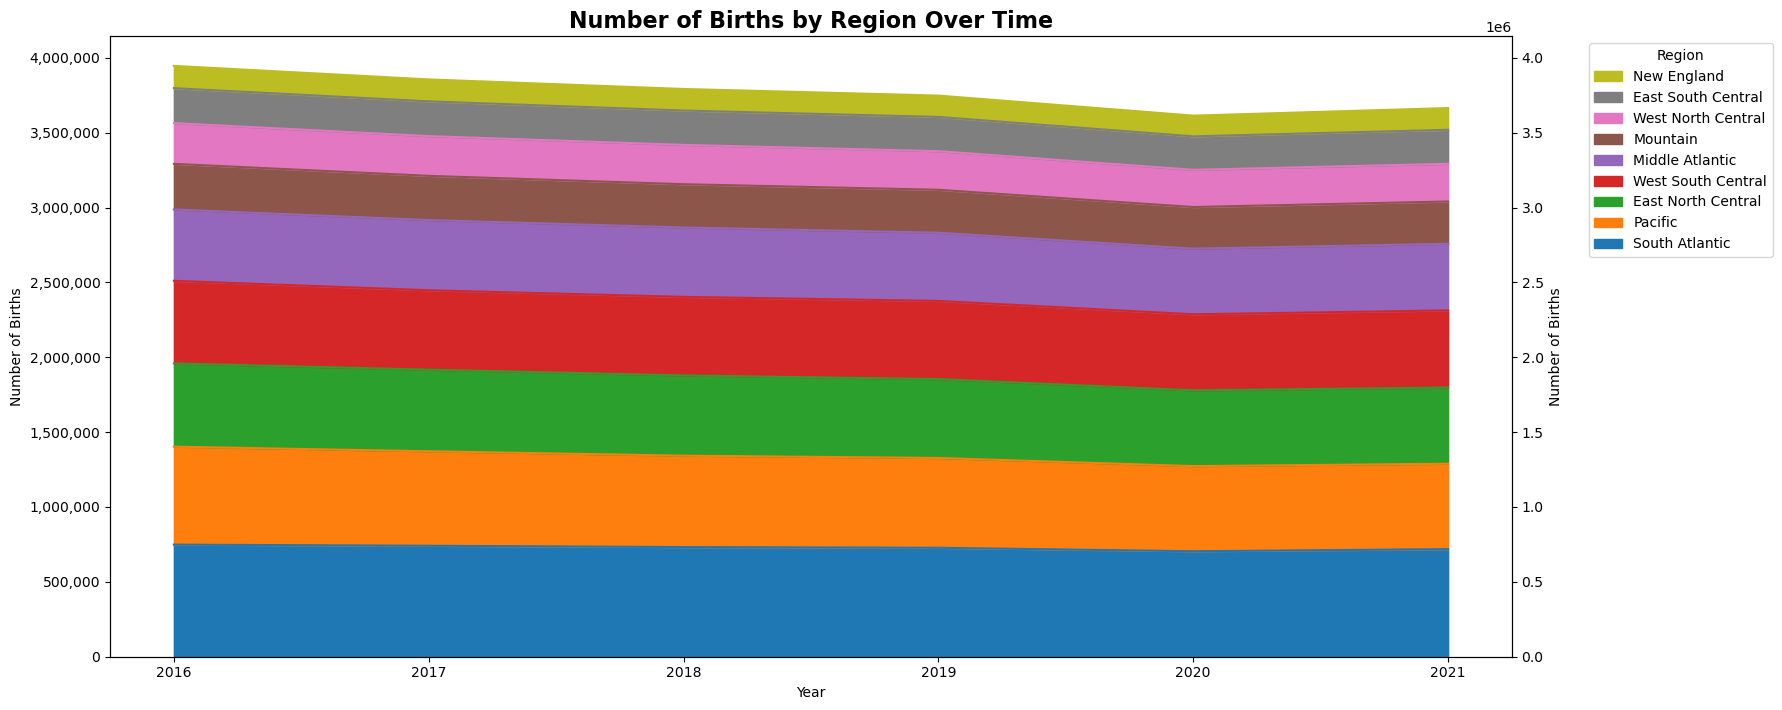

In [23]:
# Sort regions from highest births to lowest
sorted_regions = pivot_df.sum().sort_values(ascending=False).index

# Create a stacked area chart
plt.figure(figsize=(18, 8))  # Control the width to 18 for a wider x-axis
fig, ax1 = plt.subplots(figsize=(20, 8))
pivot_df[sorted_regions].plot(kind='area', stacked=True, ax=ax1)
ax1.set_title('Number of Births by Region Over Time', fontweight='bold', fontsize=16)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Births')

# Create legend with sorted regions
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Births')
ax2.set_ylim(ax1.get_ylim())  # Set the same y-axis limits as the left axis

# Add y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent cutting off y-axis labels
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plt.savefig('stacked_area_chart.png')  # Commented out the option to save the figure
plt.show()  # Display the plot
plt.close()

In [40]:
# Create a choropleth map
# Create a dataframe of unique states from the 'State' column in the aggregated dataframe and keep the column name 'State'
unique_states = agg_df['State'].unique()

# Give the dataframe a name 'State'
unique_states = pd.DataFrame(unique_states, columns=['State'])

# Show unique_states dataframe
print(unique_states.head())


        State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California


In [44]:
# Show agg_df dataframe
print(agg_df.head())

     State  Year              Region  Number of Births
0  Alabama  2016  East South Central             59151
1  Alabama  2017  East South Central             58941
2  Alabama  2018  East South Central             57761
3  Alabama  2019  East South Central             58615
4  Alabama  2020  East South Central             57647


In [45]:
# Show regions_df dataframe
print(regions_df.head())


   Index       State State Code Division              Region
0      1      Alaska         AK     West             Pacific
1      2     Alabama         AL    South  East South Central
2      3    Arkansas         AR    South  West South Central
3      4     Arizona         AZ     West            Mountain
4      5  California         CA     West             Pacific


In [46]:
# Calculate average births per year for each state
state_births = agg_df.groupby('State')['Number of Births'].mean().reset_index()
state_births = pd.merge(state_births, regions_df[['State', 'State Code']], on='State')

# Show state_births dataframe
print(state_births.head())


        State  Number of Births State Code
0     Alabama      58361.500000         AL
1      Alaska      10066.333333         AK
2     Arizona      80225.500000         AZ
3    Arkansas      36765.333333         AR
4  California     450458.500000         CA


In [53]:
# Create and show the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_births['State Code'],
    z=state_births['Number of Births'].astype(float),
    locationmode='USA-states',
    colorscale='YlOrRd',
    colorbar_title="Average Annual Births"
))

# Update layout
fig.update_layout(
    title_text='Average Annual Births by State (2016-2021)',
    geo_scope='usa',
    geo=dict(
        projection=dict(
            type='albers usa',
            scale=1.1  # Increase the scale to make states bigger
        ),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    ),
    height=800  # Increase the height of the figure
)

# Show the map
fig.show()


             State  Number of Births State Code
4       California     450458.500000         CA
43           Texas     379684.000000         TX
32        New York     221979.500000         NY
9          Florida     219354.500000         FL
13        Illinois     142377.500000         IL
38    Pennsylvania     135062.000000         PA
35            Ohio     133915.666667         OH
10         Georgia     126395.666667         GA
33  North Carolina     119296.500000         NC
22        Michigan     108618.833333         MI


Text(0, 0.5, 'Average Annual Births')

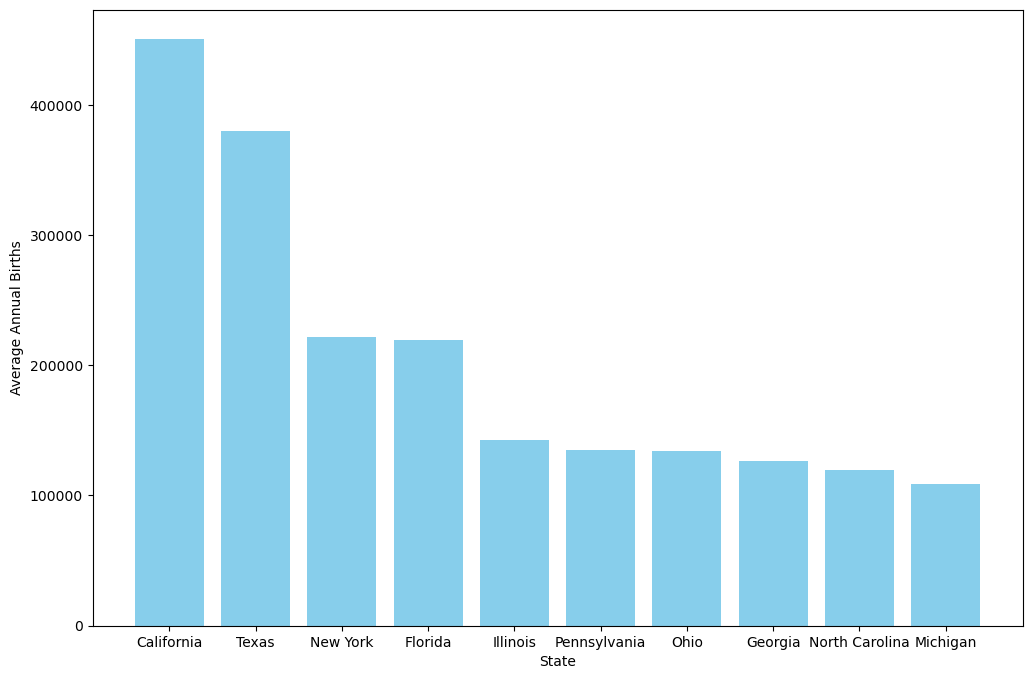

In [52]:
# Show the top 10 states with the highest average births and their average births and ranking
top_states = state_births.sort_values(by='Number of Births', ascending=False).head(10)
print(top_states)

# Create a bar chart of the top 10 states with the highest average births
plt.figure(figsize=(12, 8))
plt.bar(top_states['State'], top_states['Number of Births'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Annual Births')

In [54]:
# Perform ANOVA Test
# This test helps determine if there are statistically significant differences in births among regions
regions = pivot_df.columns
f_statistic, p_value = stats.f_oneway(*[pivot_df[region] for region in regions])

print(f"ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")


ANOVA Test Results:
F-statistic: 867.3103899513773
p-value: 1.2196056326295246e-46


In [56]:
# Show pivot_df dataframe
pivot_df.head()



Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


In [58]:
# Perform ANOVA Test
# This test helps determine if there are statistically significant differences in births among regions
regions = pivot_df.columns
f_statistic, p_value = stats.f_oneway(*[pivot_df[region] for region in regions])

print(f"ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4e}")

# Interpret ANOVA results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The differences in birth rates among regions are statistically significant.")
else:
    print("There is no statistically significant difference in birth rates among regions.")


ANOVA Test Results:
F-statistic: 867.3104
p-value: 1.2196e-46
The differences in birth rates among regions are statistically significant.


#### # Detailed Explanation of ANOVA Test Results
 
##### The Analysis of Variance (ANOVA) test was performed to determine if there are statistically significant differences in birth rates among different regions in the United States. Here's a detailed explanation of the results:
 
##### 1. F-statistic: The F-statistic (867.3104) represents the ratio of variance between groups (regions) to the variance within groups. This extremely large F-statistic suggests very substantial differences between groups.
 
##### 2. p-value: The p-value (1.2196e-46) is incredibly small, which is far less than our chosen significance level (alpha) of 0.05.
 
##### 3. Interpretation: 
    - Since the p-value (1.2196e-46) is much less than our significance level (0.05), we strongly reject the null hypothesis.
    - This means that the differences in birth rates among regions are highly statistically significant.
    - In other words, there is overwhelming evidence to suggest that birth rates vary significantly across different regions in the United States.
 
##### 4. Implications:
   - The highly significant differences indicate that geographical regions play a crucial role in birth rate variations.
   - Factors such as regional cultural differences, socioeconomic conditions, healthcare access, or demographic composition are likely contributing substantially to these variations.
    - Policymakers and healthcare professionals should prioritize considering these regional differences when planning and implementing reproductive health strategies.
 
##### 5. Further Analysis:
    - While ANOVA tells us that significant differences exist, it doesn't specify which regions differ from each other.
    - Post-hoc tests (e.g., Tukey's HSD) should be conducted to identify specific regional differences.
    - Additional factors like education level, age of mother, or economic indicators could be incorporated for a more comprehensive analysis.
    - Given the extremely low p-value, it would be valuable to investigate the magnitude of these differences and their practical significance.
 
##### This ANOVA result provides an exceptionally strong foundation for further investigation into regional birth rate patterns and their underlying causes. The extremely low p-value suggests that these regional differences are not only statistically significant but also likely to be of substantial practical importance.


In [60]:
# Show pivot_df dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


In [59]:
# Calculate Compound Annual Growth Rate (CAGR)
# CAGR helps understand the year-over-year growth rate for each region
def calculate_cagr(start_value, end_value, num_years):
    return (end_value / start_value) ** (1 / num_years) - 1

cagr_results = {}
for region in regions:
    start_value = pivot_df[region].iloc[0]  # First year value
    end_value = pivot_df[region].iloc[-1]   # Last year value
    num_years = len(pivot_df) - 1           # Number of years in the dataset
    cagr = calculate_cagr(start_value, end_value, num_years)
    cagr_results[region] = cagr

# Sort regions by CAGR in descending order
sorted_cagr = sorted(cagr_results.items(), key=lambda x: x[1], reverse=True)

print("\nCompound Annual Growth Rate (CAGR) by Region:")
for region, cagr in sorted_cagr:
    print(f"{region}: {cagr:.2%}")

# Identify regions with positive and negative growth
positive_growth = [region for region, cagr in cagr_results.items() if cagr > 0]
negative_growth = [region for region, cagr in cagr_results.items() if cagr < 0]

print(f"\nRegions with positive growth: {', '.join(positive_growth)}")
print(f"Regions with negative growth: {', '.join(negative_growth)}")

# Calculate and print the overall CAGR for the entire country
total_start = pivot_df.iloc[0].sum()
total_end = pivot_df.iloc[-1].sum()
total_cagr = calculate_cagr(total_start, total_end, num_years)
print(f"\nOverall CAGR for the entire country: {total_cagr:.2%}")


Compound Annual Growth Rate (CAGR) by Region:
New England: -0.48%
East South Central: -0.54%
South Atlantic: -0.82%
Middle Atlantic: -1.36%
West South Central: -1.37%
Mountain: -1.50%
West North Central: -1.56%
East North Central: -1.75%
Pacific: -2.70%

Regions with positive growth: 
Regions with negative growth: East North Central, East South Central, Middle Atlantic, Mountain, New England, Pacific, South Atlantic, West North Central, West South Central

Overall CAGR for the entire country: -1.47%


#### Analysis 2: What are the differences in birth weights by gender across states?


In [61]:
# Group data by state and gender, calculating the average birth weight
grouped_data = births_df.groupby(['State', 'Gender'])['Average Birth Weight (g)'].mean().reset_index()

# Pivot the data for easier analysis and comparison
# Create a new DataFrame with States as index and Gender as columns
pivot_data = grouped_data.pivot(index='State', columns='Gender', values='Average Birth Weight (g)')

# Calculate the difference in birth weight between males and females
# Positive values indicate higher male birth weights, negative values indicate higher female birth weights
pivot_data['Difference'] = pivot_data['M'] - pivot_data['F']

# Display the first few rows of the pivoted data
print(pivot_data.head())

Gender                F            M  Difference
State                                           
Alabama     3143.812963  3246.807407  102.994444
Alaska      3309.364815  3408.755556   99.390741
Arizona     3198.948148  3306.620370  107.672222
Arkansas    3173.883333  3278.864815  104.981481
California  3228.031481  3329.827778  101.796296


In [62]:
# Print Descriptive statistics
print("\nDescriptive Statistics:")
print(pivot_data.describe())


Descriptive Statistics:
Gender            F            M  Difference
count     51.000000    51.000000   51.000000
mean    3194.639285  3307.222147  112.582862
std       48.526202    49.635573   10.466030
min     3085.698148  3189.077778   83.375926
25%     3168.421296  3278.650000  107.245370
50%     3194.972222  3305.390741  113.087037
75%     3226.430556  3341.583333  118.346296
max     3309.364815  3408.755556  142.031481


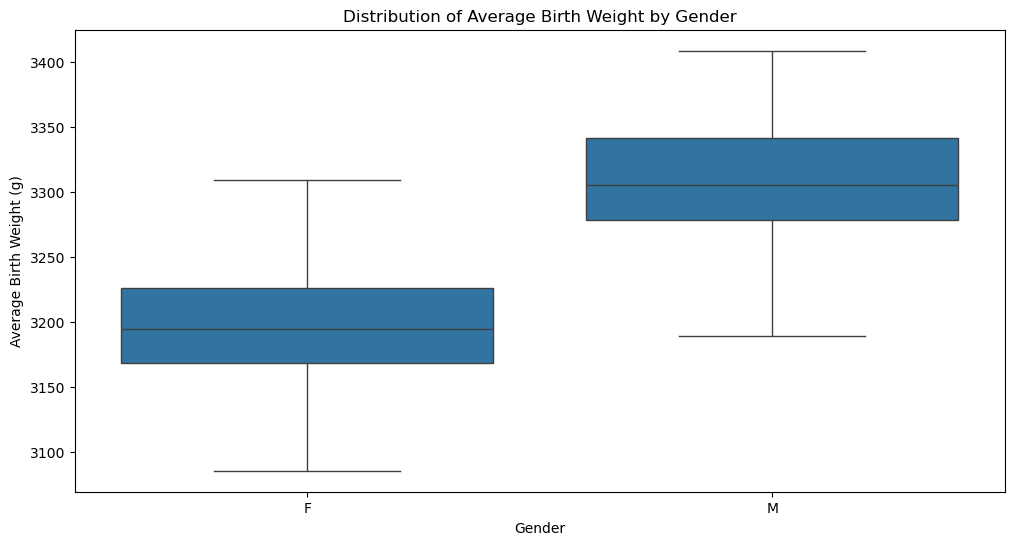

In [63]:
# Create Analysis Visualization: Box plot
# This visualization will help us compare the distribution of birth weights between genders

# Set up the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a box plot using seaborn
# x-axis: Gender (M/F)
# y-axis: Average Birth Weight in grams
# data: Using the grouped_data DataFrame we created earlier
sns.boxplot(x='Gender', y='Average Birth Weight (g)', data=grouped_data)

# Set a descriptive title for the plot
plt.title('Distribution of Average Birth Weight by Gender')

# Add labels to axes for clarity
plt.xlabel('Gender')
plt.ylabel('Average Birth Weight (g)')

# Display the plot
plt.show()

# This box plot will show:
# - The median birth weight for each gender
# - The interquartile range (IQR) of birth weights
# - Any outliers in the data
# It will help us visually assess if there are significant differences in birth weights between genders

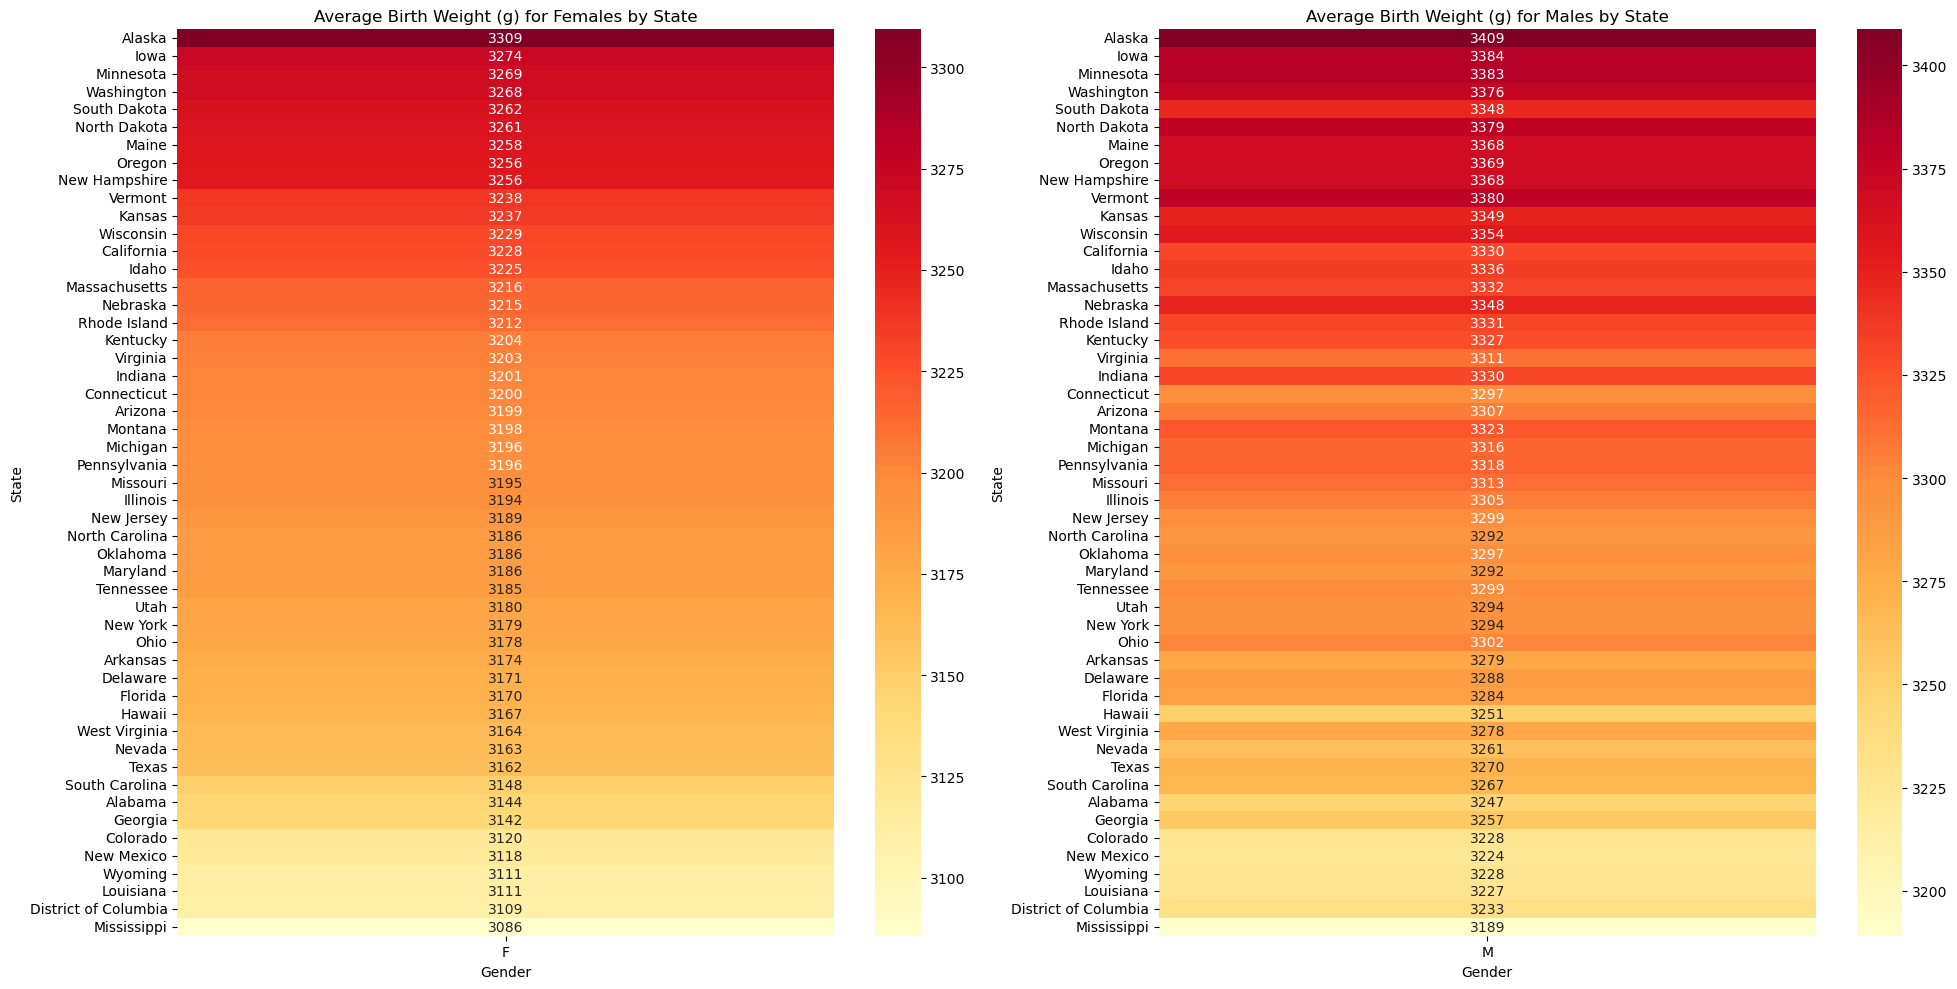

In [65]:
# Visualization: Heatmaps for Average Birth Weight by Gender and State
# This visualization will help us compare birth weights across states for both genders

# Sort the pivot_data by birth weight values
pivot_data_sorted = pivot_data.sort_values(by=['F', 'M'], ascending=False)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap for Females
sns.heatmap(pivot_data_sorted[['F']], ax=ax1, cmap='YlOrRd', annot=True, fmt='.0f')
ax1.set_title('Average Birth Weight (g) for Females by State')
# YlOrRd colormap: Yellow (lower values) to Red (higher values)
# annot=True: Display the values in each cell
# fmt='.0f': Format the values as integers

# Heatmap for Males
sns.heatmap(pivot_data_sorted[['M']], ax=ax2, cmap='YlOrRd', annot=True, fmt='.0f')
ax2.set_title('Average Birth Weight (g) for Males by State')
# Using the same colormap and formatting for consistency

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# This visualization allows us to:
# 1. Quickly identify states with higher or lower birth weights for each gender
# 2. Compare patterns between male and female birth weights across states
# 3. Spot any regional trends or anomalies in birth weights
# 4. Observe the distribution of birth weights from highest to lowest across states

### CONCLUSION: 